In [1]:
df=pd.read_excel("E:\HTL Project\Dataset 1.xlsx")
df.head()

<IPython.core.display.Javascript object>

,Feedstock,C,H,N,O,S,Temp,Time,Catalyst,Pressure,HHV,ERR,Yield%
0,Spirulina platensis,72.7,8.8,6.3,11.5,0.6,300,30,Na2CO3,130,35.2,37.2,36.0
1,Nannochloropsis,76.0,10.3,3.9,9.0,0.8,350,60,H-ZSM5,180,37.9,42.7,43.0
2,Chlorella vulgaris,70.6,9.2,5.5,12.3,0.4,250,60,LiOH,100,33.8,33.0,33.0
3,Porphyridium purpureum,69.1,8.4,5.0,15.2,0.5,250,30,NaN,100,34.8,41.5,24.7
4,Dunaliella tertiolecta,72.0,8.8,6.2,9.9,0.3,375,50,Na2CO3,221,36.0,64.8,55.3


In [2]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Feedstock']=le.fit_transform(df['Feedstock'])
df['Catalyst']=le.fit_transform(df['Catalyst'])

In [3]:
df['S']=df['S'].fillna(df['S'].mode()[0])
df['ERR']=df['ERR'].fillna(df['ERR'].mode()[0])

In [12]:
x=df.drop('ERR',axis=1)
y=df['ERR']
from sklearn.feature_selection import SelectFromModel
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)
print(encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(encoded))
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,encoded)
y_pred =clf.predict(x_test)
y_pred
from sklearn.metrics import r2_score
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred-y_test)))
print("Root mean square error: " ,np.mean(y_pred-y_test)**2)
print("R2 square: " ,r2_score(y_pred,y_test))
clf1 = tree.DecisionTreeClassifier()
clf1.fit(x_train,encoded)
y_pred1 =clf1.predict(x_train)
y_pred1
from sklearn.metrics import r2_score
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred1-y_train)))
print("Root mean square error: " ,np.mean(y_pred1-y_train)**2)
print("R2 square: " ,r2_score(y_pred1,y_train))

<IPython.core.display.Javascript object>

[33 19  3 27 23 45 24 56  6 55 22 45  8  8  8 38 14 37 32 59 16 28 31  9
 43 54 13  7  9 57 41  8 21 17  9  8 11  1  2 48 29 10 46 58  8 26 51 34
 30 54 44 49 60 40 38 35  8  8 53 15  8 39 52 36  7  0  5  4  8  8 50 20
 16 47 25 18 19  8 12 42]
continuous
multiclass
multiclass


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  7.440000000000002


<IPython.core.display.Javascript object>

Root mean square error:  1.1448999999999996
R2 square:  0.6864987674853732


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  4.45125


<IPython.core.display.Javascript object>

Root mean square error:  0.7590765625000003
R2 square:  0.9189433081428713


In [13]:
params = {
    'max_depth': [5,10,20,50,100]
}

In [14]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator=clf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=4, verbose=2)

In [15]:
rf_grid.fit(x_train,encoded)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'max_depth': [5, 10, 20, 50, 100]}, verbose=2)

In [16]:
rf_grid.best_params_

{'max_depth': 50}

In [17]:
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data.head()

<IPython.core.display.Javascript object>

,Actual,Predicted
67,7.2,18
30,23.6,26
13,57.2,57
9,15.5,11
41,25.0,5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

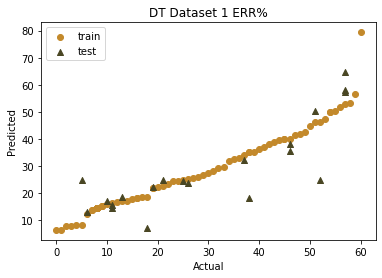

In [19]:
plt.scatter(y_pred1,y_train,label='train',color='#c3892b')
plt.scatter(y_pred,y_test,label='test',color='#494623',marker ="^")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("DT Dataset 1 ERR%")
plt.legend()